In [7]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.tsa.arima.model import ARIMA
import lmdiag


df  = pd.read_csv('/Users/aidanastridge/Documents/BOCBond.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')
df['RealReturndiff'] = df['RealReturn'].diff()
df['Benchmarkdiff'] = df['Benchmark'].diff()


In [8]:
df

,Date,Benchmark,RealReturn,RealReturndiff,Benchmarkdiff
0,2007-03-14,4.11,1.75,NaN,NaN
1,2007-03-21,4.18,1.76,0.01,0.07
2,2007-03-28,4.21,1.77,0.01,0.03
3,2007-04-04,4.19,1.76,-0.01,-0.02
4,2007-04-11,4.23,1.77,0.01,0.04
...,...,...,...,...,...
517,2017-02-08,2.29,0.57,-0.08,-0.12
518,2017-02-15,2.46,0.72,0.15,0.17
519,2017-02-22,2.42,0.70,-0.02,-0.04
520,2017-03-01,2.39,0.66,-0.04,-0.03


First differenced

In [10]:
mod = smf.ols(formula='RealReturndiff ~ Benchmarkdiff - 1', data=df)
mod = mod.fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         RealReturndiff   R-squared (uncentered):                   0.670
Model:                            OLS   Adj. R-squared (uncentered):              0.669
Method:                 Least Squares   F-statistic:                              1056.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):                   2.76e-127
Time:                        13:29:45   Log-Likelihood:                          856.82
No. Observations:                 521   AIC:                                     -1712.
Df Residuals:                     520   BIC:                                     -1707.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Benchmarkdiff     0.8201      0.025     32.493      0.000       0.771       0.870
==============================================================================
Omnibus:                       88.598   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              647.628
Skew:                           0.499   Prob(JB):                    2.34e-141
Kurtosis:                       8.370   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lmdiag/plot.py:283: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x, np.sqrt((0.5 * params_len * (1 - x)) / x), "r--")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lmdiag/plot.py:284: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x, np.sqrt((1.0 * params_len * (1 - x)) / x), "r--")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lmdiag/plot.py:285: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x, np.negative(np.sqrt((0.5 * params_len * (1 - x)) / x)), "r--")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lmdiag/plot.py:286: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x, np.negative(np.sqrt((1.0 * params_len * (1 - x)) / x)), "r--")


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

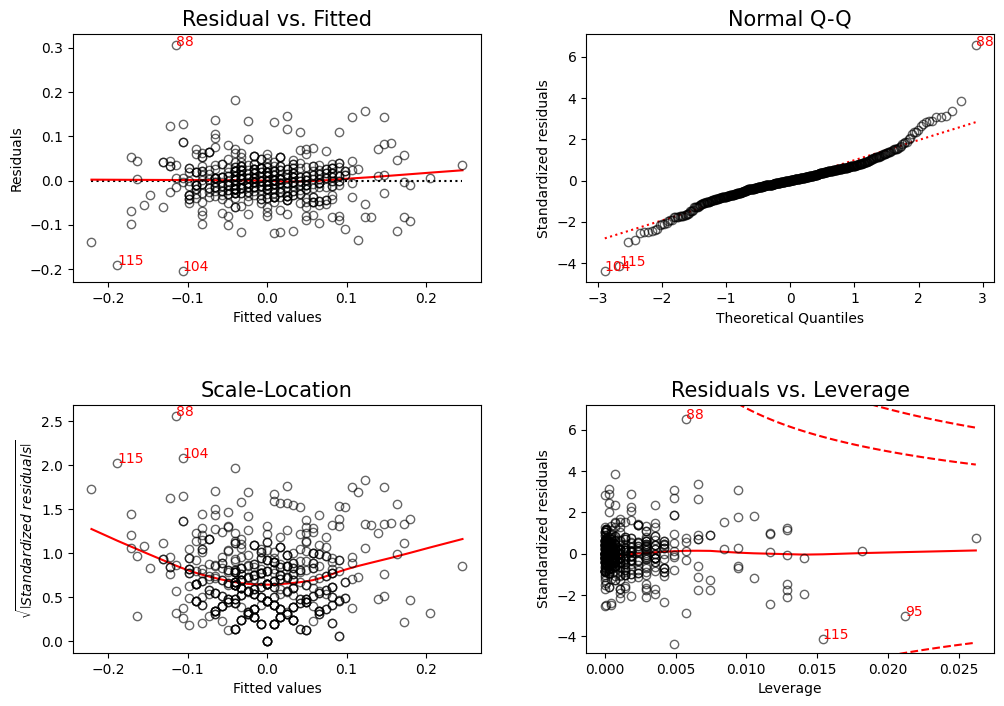

In [11]:
plt.figure(figsize=(10,7))
lmdiag.plot(mod)

In [12]:
model = ARIMA(mod.resid, order=(1,0,0))
model_fit = model.fit()
model_fit.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  521
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 860.448
Date:                Wed, 26 Jul 2023   AIC                          -1714.896
Time:                        13:30:00   BIC                          -1702.129
Sample:                             0   HQIC                         -1709.895
                                - 521                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.002      0.285      0.776      -0.004       0.005
ar.L1          0.1168      0.033      3.581      0.000       0.053       0.181
sigma2         0.0022   7.48e-05     28.764      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               542.26
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

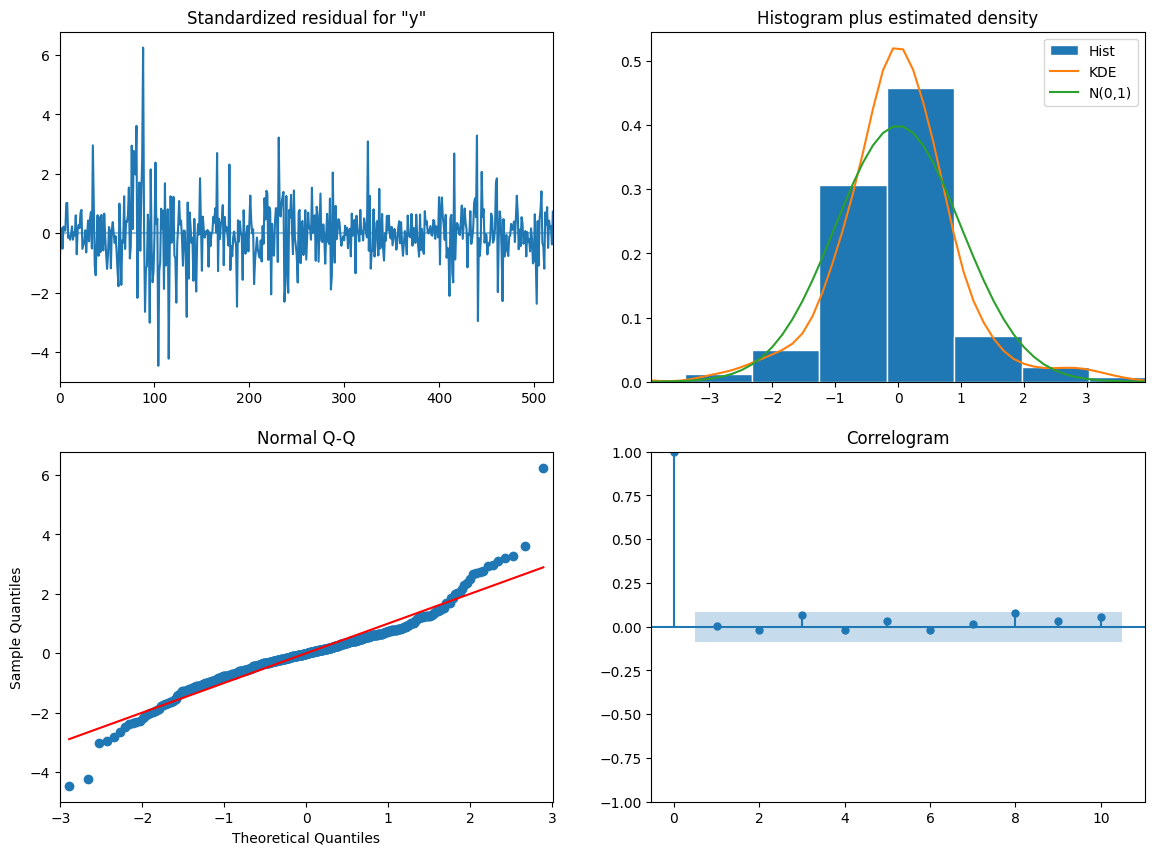

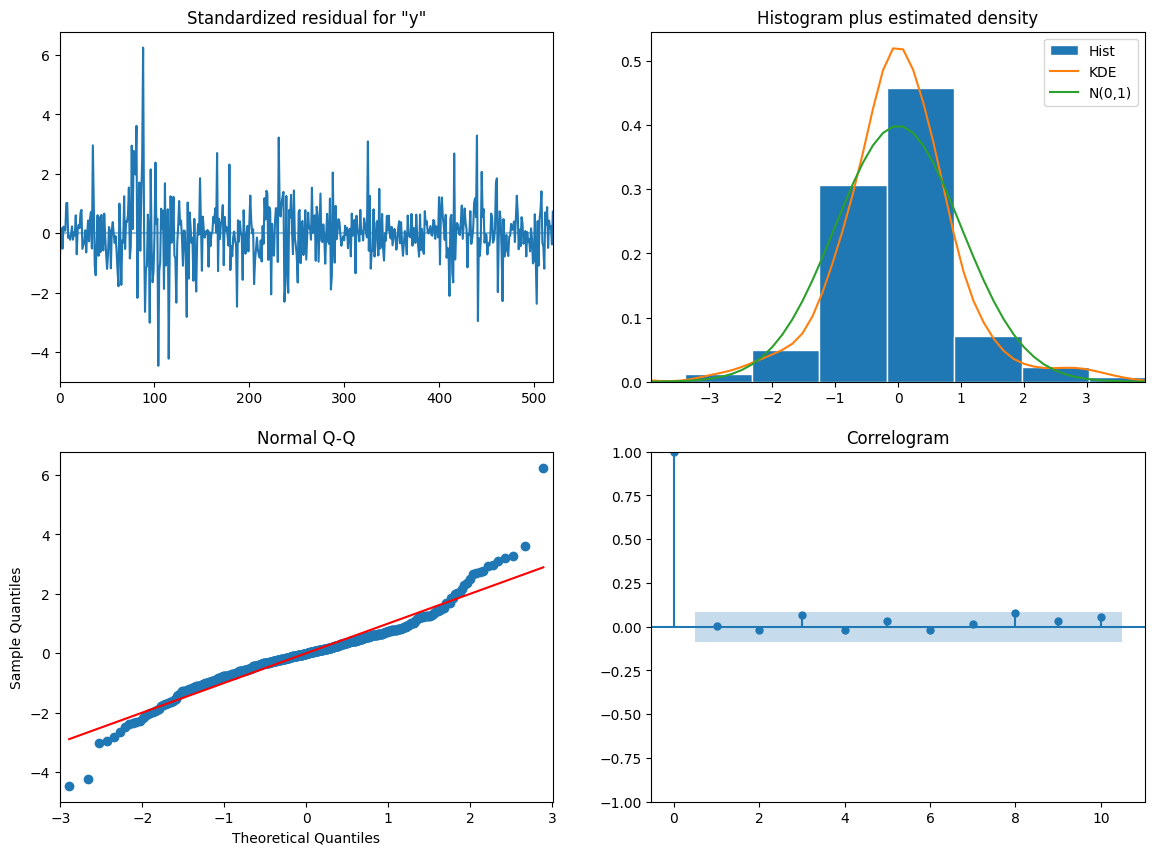

In [13]:
model_fit.plot_diagnostics(figsize=(14,10))

In [15]:
a = model_fit.forecast(steps=5)
a

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


521    0.004406
522    0.001114
523    0.000729
524    0.000684
525    0.000679
Name: predicted_mean, dtype: float64

Forecasted residuals for next five periods

In [32]:
res = []
b = mod.fittedvalues[521]
for i in range(521,526,1):
    b = a[i] + b
    res.append(b)
res

[0.06181525423662178,
 0.0629288140502895,
 0.06365764895032824,
 0.06434153501895026,
 0.06502016954972235]

Forecasted real return for next five periods

In [33]:
res2 = []
c = df['RealReturn'][521]
for i in range(0,5,1):
    c = c + res[i]
    res2.append(c)
res2

[0.8118152542366218,
 0.8747440682869113,
 0.9384017172372395,
 1.0027432522561899,
 1.0677634218059122]